# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read Data

In [2]:
data=pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

# Data Describe

In [3]:
data.head(6)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   
5         WNW           56.0          W  ...        55.0         23.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
5       1009.2       1005.4       NaN       NaN     20.6     28.9         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  

[6 rows x 23 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [6]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

There is a huge amount of null values

In [7]:
df=data.copy()
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

# Data Preprocessing & Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<AxesSubplot: title={'center': 'Count (RainTomorrow)'}>

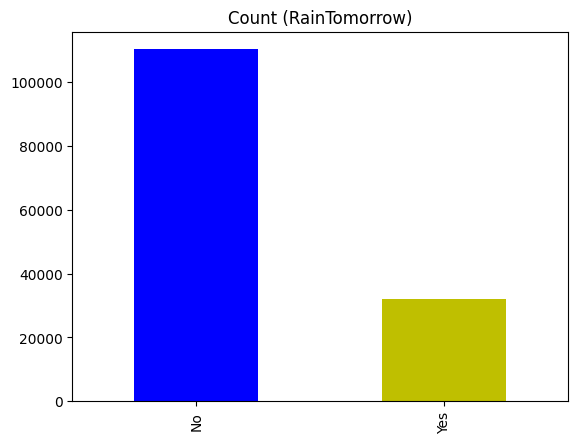

In [9]:
df['RainTomorrow'].value_counts().plot(kind='bar', title='Count (RainTomorrow)', color=['b', 'y'])

We have the problem of imbalance It means that we need to process the dataset before modeling

In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
df.duplicated().sum()

0

<AxesSubplot: >

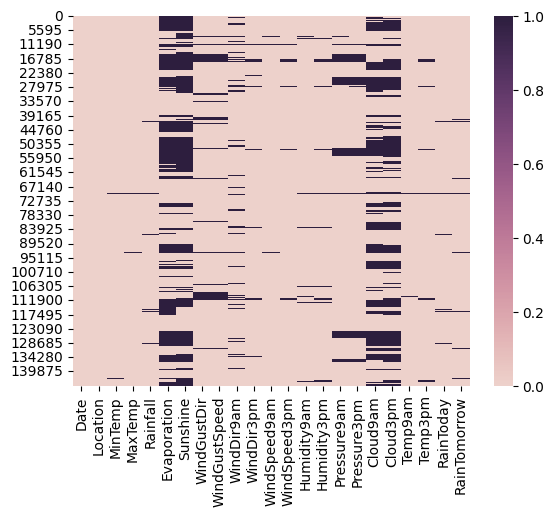

In [12]:
sns.heatmap( df.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

filling the null values

In [13]:
fill_list = df['MinTemp'].dropna()
df['MinTemp'] = df['MinTemp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [14]:
fill_list = df['MaxTemp'].dropna()
df['MaxTemp'] = df['MaxTemp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [15]:
fill_list = df['Rainfall'].dropna()
df['Rainfall'] = df['Rainfall'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [16]:
fill_list = df['Evaporation'].dropna()
df['Evaporation'] = df['Evaporation'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [17]:
fill_list = df['Sunshine'].dropna()
df['Sunshine'] = df['Sunshine'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [18]:
fill_list = df['WindGustDir'].dropna()
df['WindGustDir'] = df['WindGustDir'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [19]:
fill_list = df['WindGustSpeed'].dropna()
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [20]:
fill_list = df['WindDir9am'].dropna()
df['WindDir9am'] = df['WindDir9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [21]:
fill_list = df['WindDir3pm'].dropna()
df['WindDir3pm'] = df['WindDir3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [22]:
fill_list = df['WindSpeed9am'].dropna()
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [23]:
fill_list = df['WindSpeed3pm'].dropna()
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [24]:
fill_list = df['Humidity9am'].dropna()
df['Humidity9am'] = df['Humidity9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [25]:
fill_list = df['Humidity3pm'].dropna()
df['Humidity3pm'] = df['Humidity3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [26]:
fill_list = df['Pressure9am'].dropna()
df['Pressure9am'] = df['Pressure9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [27]:
fill_list = df['Pressure3pm'].dropna()
df['Pressure3pm'] = df['Pressure3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [28]:
fill_list = df['Cloud9am'].dropna()
df['Cloud9am'] = df['Cloud9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [29]:
fill_list = df['Cloud3pm'].dropna()
df['Cloud3pm'] = df['Cloud3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [30]:
fill_list = df['Temp9am'].dropna()
df['Temp9am'] = df['Temp9am'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [31]:
fill_list = df['Temp3pm'].dropna()
df['Temp3pm'] = df['Temp3pm'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [32]:
fill_list = df['RainToday'].dropna()
df['RainToday'] = df['RainToday'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [33]:
fill_list = df['RainTomorrow'].dropna()
df['RainTomorrow'] = df['RainTomorrow'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [34]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot: >

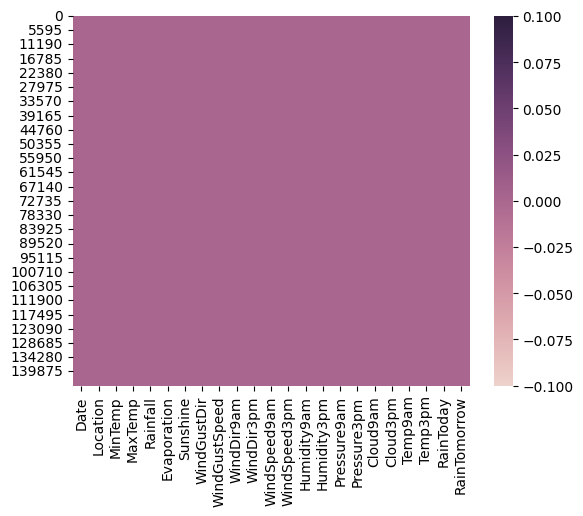

In [35]:
sns.heatmap( df.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

now we don't have null values

# Data Visualization

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

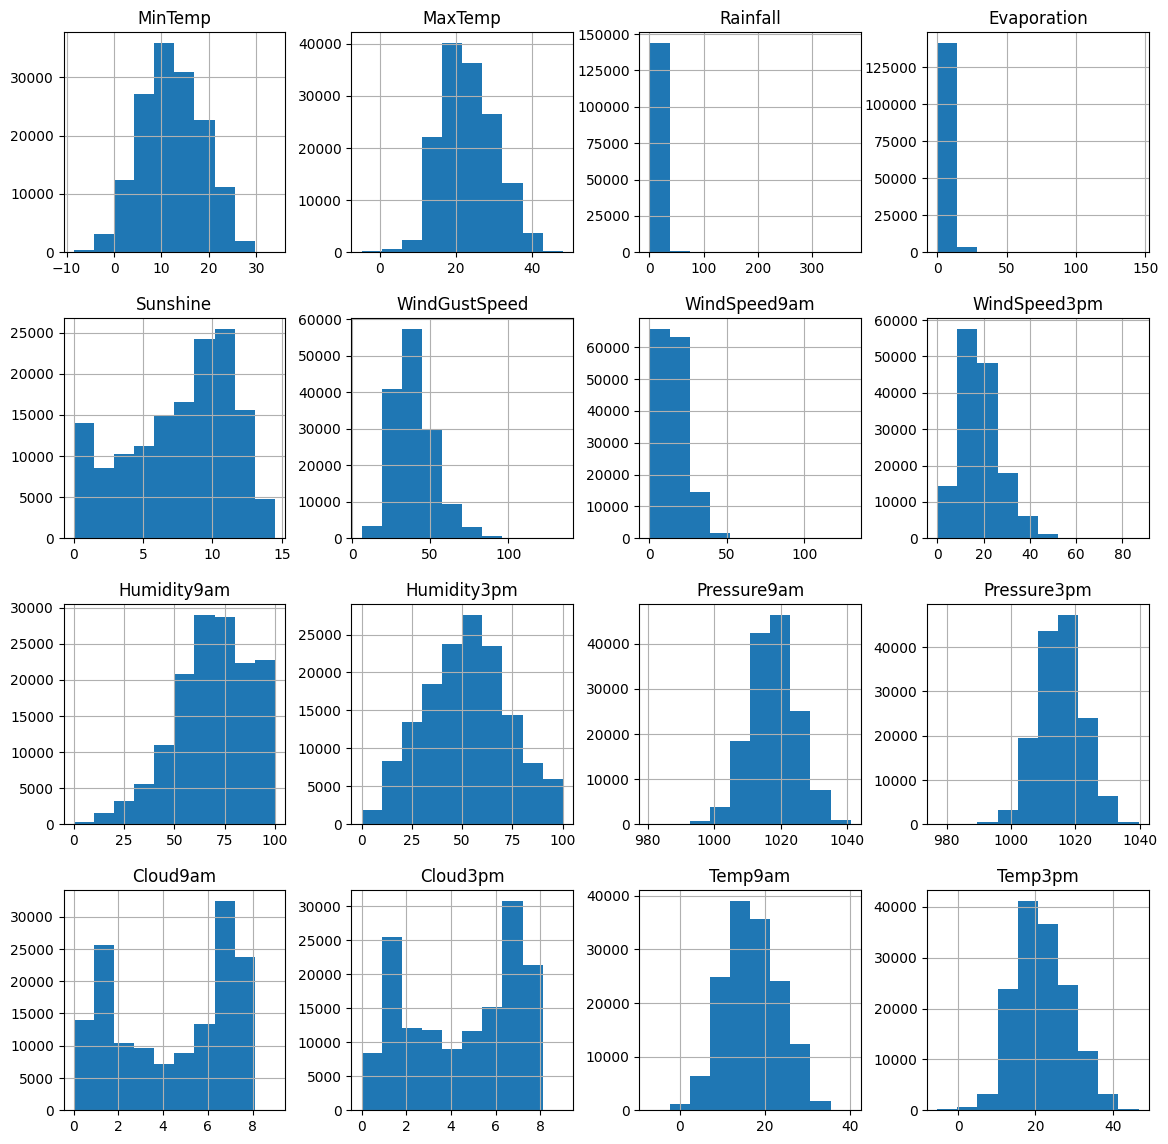

In [37]:
df.hist(bins = 10 , figsize= (14,14))
plt.show()

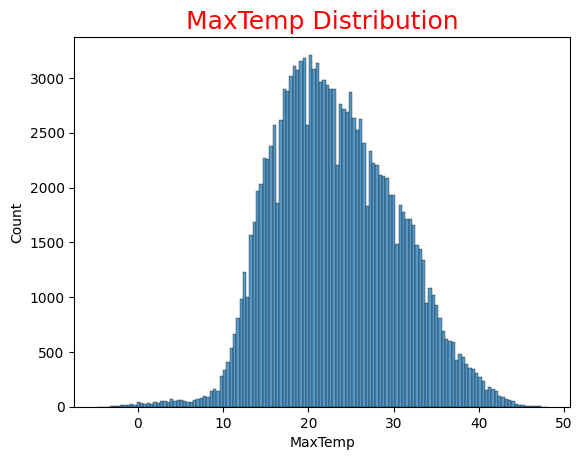

In [38]:
sns.histplot(x=df.MaxTemp)
plt.title("MaxTemp Distribution", color="red", fontsize=18);

The maximum temperature distribution ranges from 0 to approximately 50

<AxesSubplot: xlabel='WindSpeed3pm', ylabel='Count'>

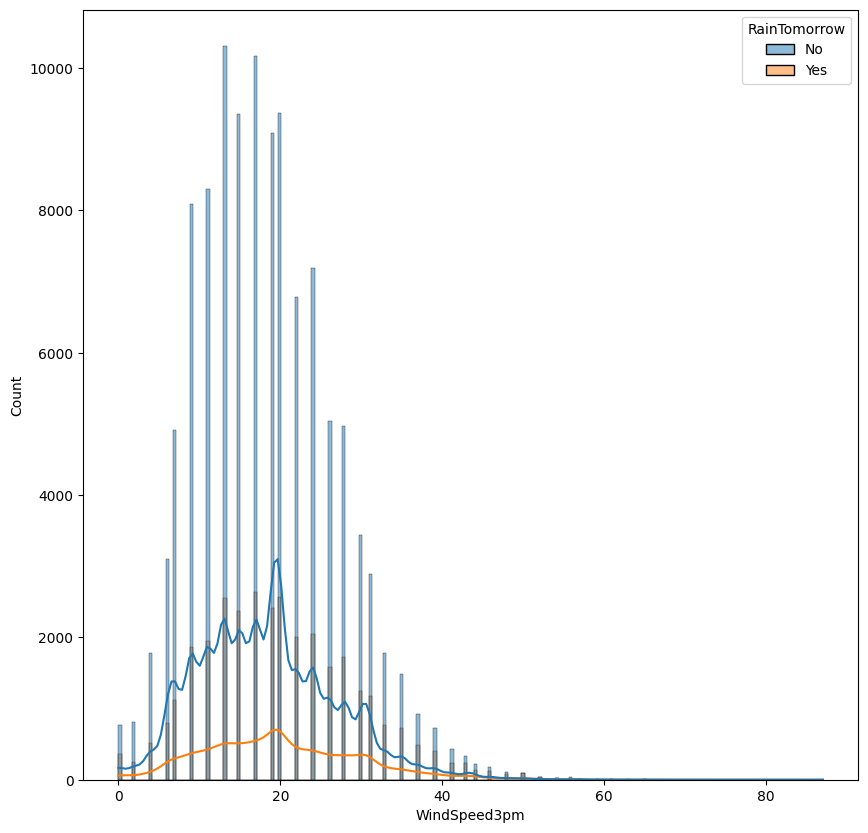

In [39]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'WindSpeed3pm', hue = 'RainTomorrow', data = df , kde=True )

In [40]:
fig = px.histogram(df, x="Evaporation")
fig.show()

The evaporation rate distribution is concentrated between 0 to 20

In [41]:
fig = px.pie(df, names='RainToday', title='RainToday',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

The probability that it will rain today is very small compared to the possibility that it will not rain today

<AxesSubplot: xlabel='RainToday', ylabel='count'>

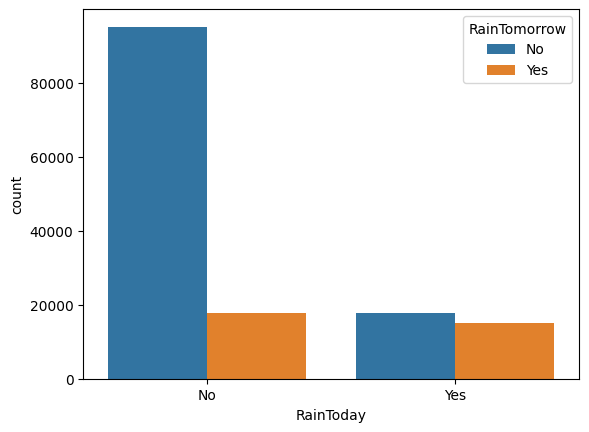

In [42]:
sns.countplot(data=df, x="RainToday", hue="RainTomorrow")

For maximum records it didn't rain for both days. For nearly 20,000 records it didn't rain today but rained tomorrow and rained for both days. For nearly 20,000 records it rained today but didn't rain tomorrow.

In [43]:
px.scatter(df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

It shows a linear positive correlation between minimum temperature and maximum temperature.

<AxesSubplot: xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

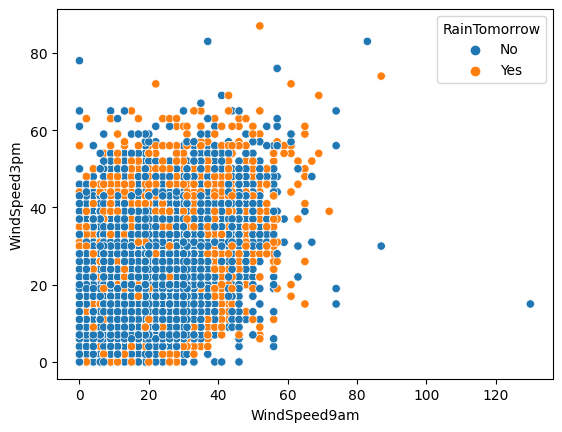

In [44]:
sns.scatterplot(data=df,x='WindSpeed9am',y='WindSpeed3pm',hue='RainTomorrow')

<AxesSubplot: xlabel='Sunshine', ylabel='Humidity9am'>

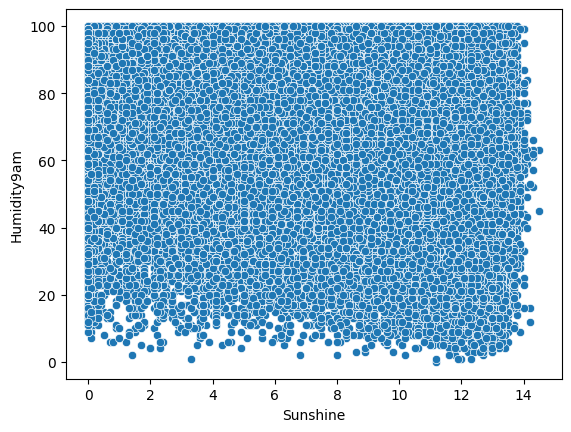

In [45]:
sns.scatterplot(data=df, x="Sunshine", y="Humidity9am")

<AxesSubplot: xlabel='RainTomorrow', ylabel='Rainfall'>

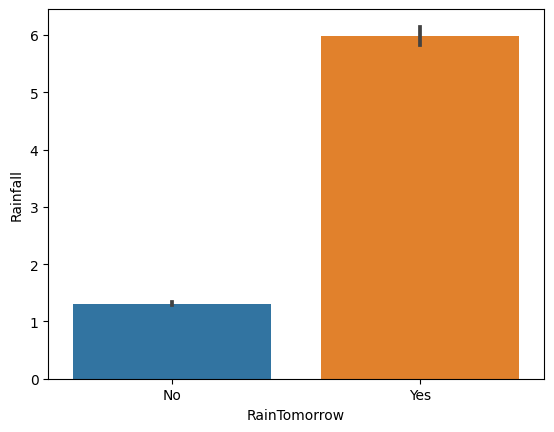

In [46]:
sns.barplot(data=df, x="RainTomorrow", y="Rainfall")

The higher the rate of rain, the greater the probability of rain tomorrow

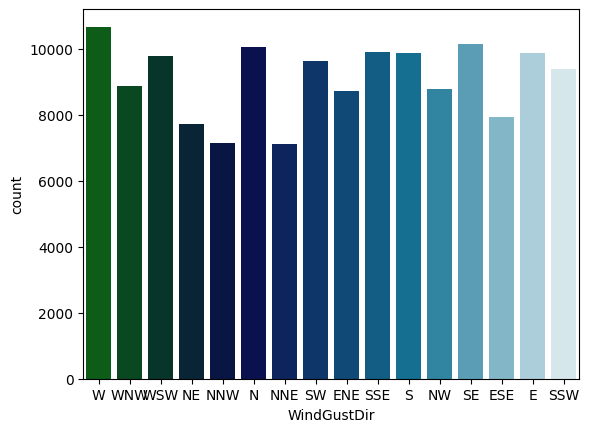

In [47]:
b=sns.countplot(x= 'WindGustDir' ,data = df ,palette='ocean'  )
plt.show()

Wind Gust Direction for maximum records(nearly 12000) is West.

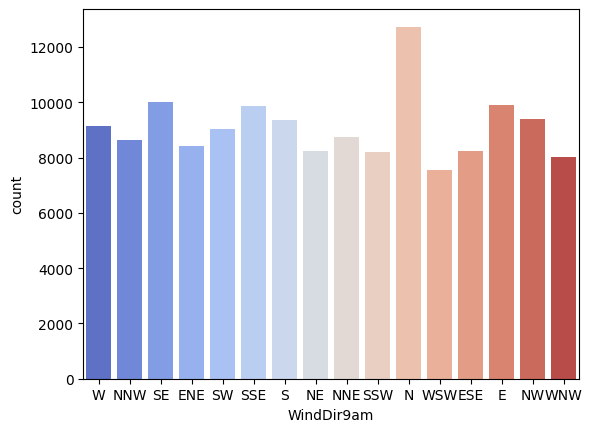

In [48]:
b=sns.countplot(x= 'WindDir9am' ,data = df ,palette='coolwarm'  )
plt.show()

Wind Direction at 9AM for maximum records is North followed by North-West and East.

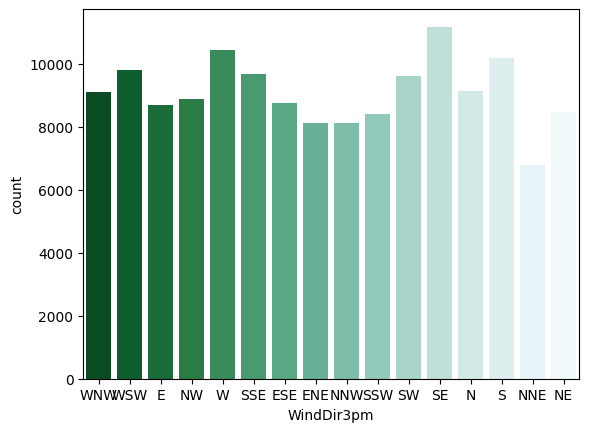

In [49]:
b=sns.countplot(x= 'WindDir3pm' ,data = df ,palette='BuGn_r'  )
plt.show()

Wind Direction at 3PM for maximum records is South East

In [50]:
px.histogram(df, x='Location', 
             title='Location vs. Rainy Days', 
             color='RainToday')

Nhil, Darwin, Uluru reports least rain today
,canberra receives most rain among 49 locations.

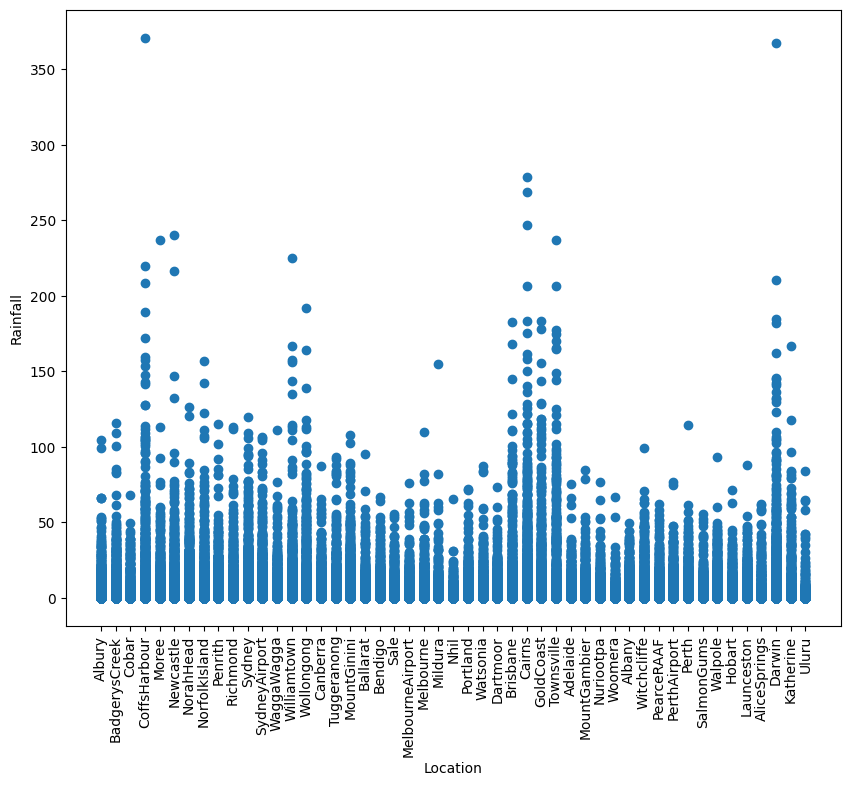

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(df['Location'],df['Rainfall'])
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.ylabel("Rainfall")
plt.show()

Highest rain rates in Coffs Harbor and Darwin

In [52]:
px.scatter(df,
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

If the temperature today is low and humidity is high, it may rain tomorrow.
If temperature today is high and humidity is low, it may not rain tomorrow

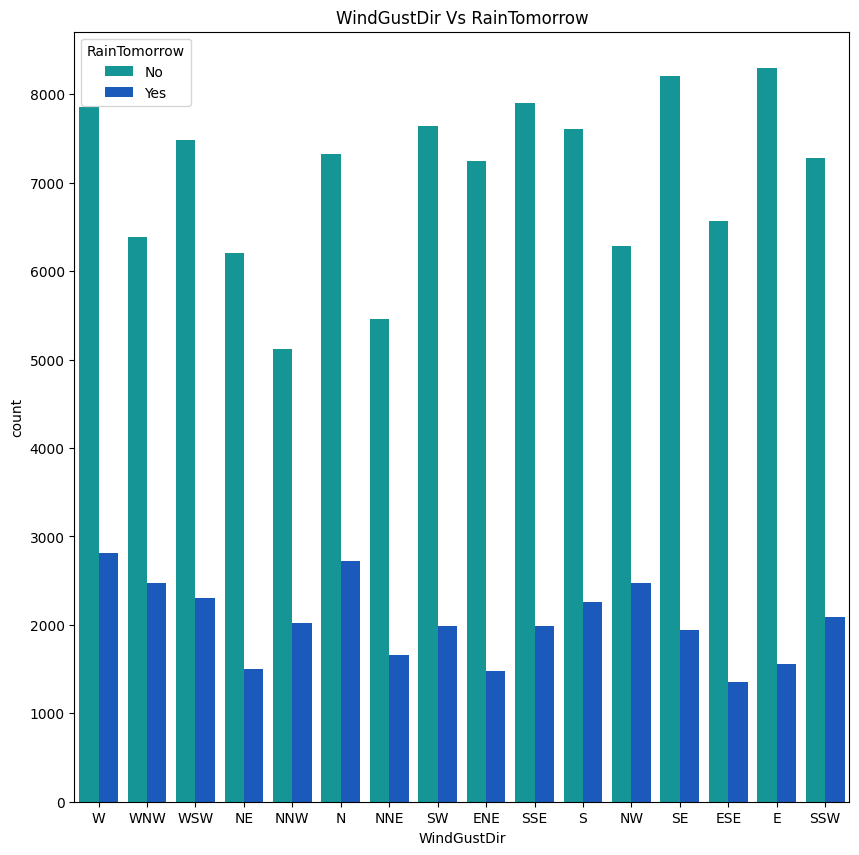

In [53]:
plt.figure(figsize=(10,10))
sns.countplot(x= 'WindGustDir' ,data =df ,palette='winter_r',hue='RainTomorrow')
plt.title('WindGustDir Vs RainTomorrow')
plt.show()

When the windGustDir  in the west, more rain is expected

<AxesSubplot: xlabel='WindGustSpeed', ylabel='Density'>

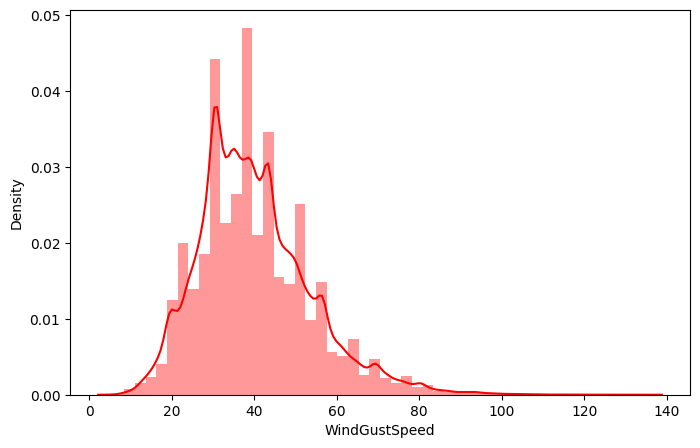

In [54]:
plt.figure(figsize=(8,5))
sns.distplot(df['WindGustSpeed'], hist=True, color='red')

Wind Gust Speed ranges from 0 to nearly 140 km/hr.
Highest concentration of points for Wind Gust Speed is between 38-40 km/hr.

In [55]:
px.scatter(df,
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Cloud9am',
           y='Cloud3pm',
           color='RainTomorrow')

<AxesSubplot: xlabel='Cloud3pm', ylabel='Count'>

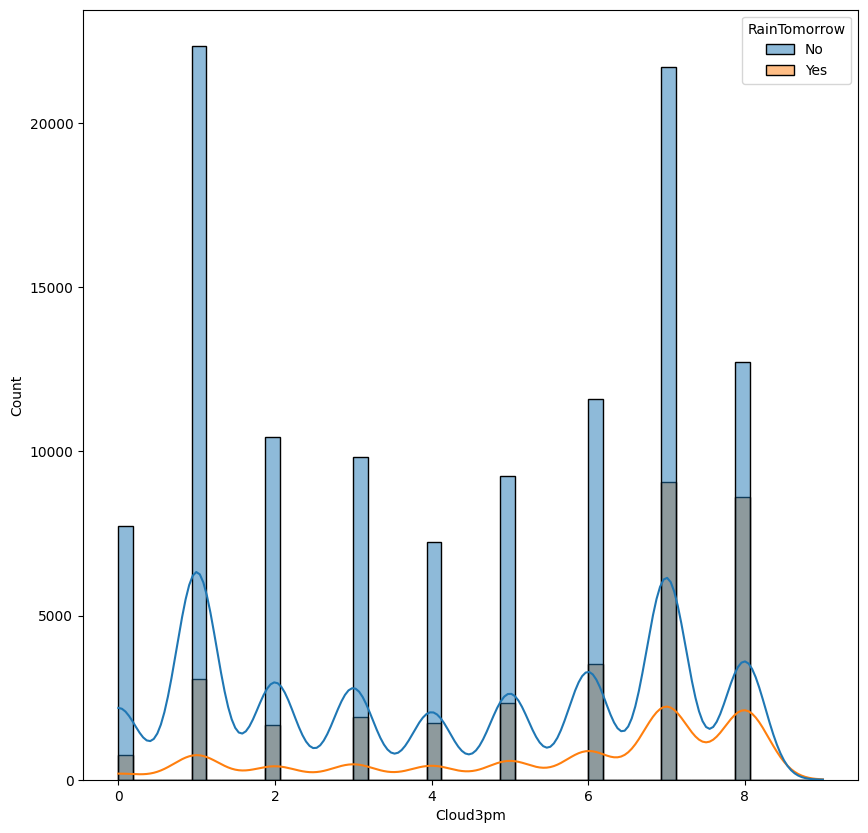

In [56]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'Cloud3pm', hue = 'RainTomorrow', data = df , kde=True )

When the percentage of clouds increases, the probability of rain increases tomorrow

# Encoding the String Dataset

In [57]:
df.describe(include=object)

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      145460     145460     145460    145460   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436       10661      12735      11181    112837   

       RainTomorrow  
count        145460  
unique            2  
top              No  
freq         112855

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
cols = ['Date', 'Location', 'WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  int64  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

<AxesSubplot: >

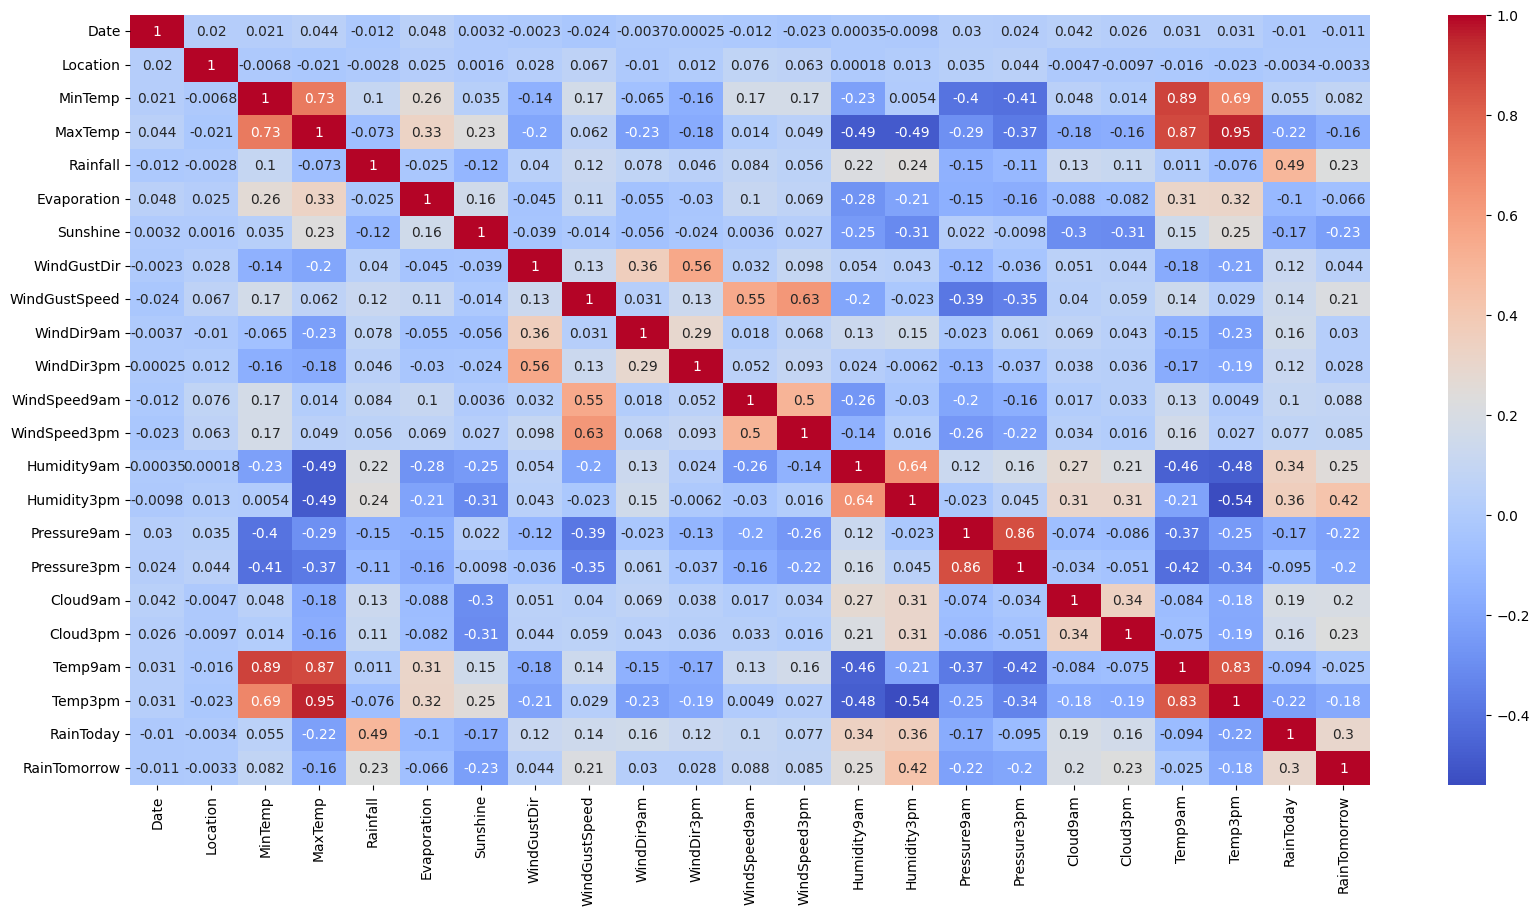

In [61]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

In [62]:
df.drop(columns=["MinTemp","MaxTemp","Temp9am","Pressure3pm"], inplace=True)

# Train Test Split 

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x=df.drop('RainTomorrow',axis=1).values
y=df['RainTomorrow'].values

In [65]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.1 , random_state= 42)

Let's dealing with the problem of imbalance in our target column 

# SMOTE

In [66]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
print('Original ytrain dataset shape %s' % Counter(y_train))
x_train_smote, y_train_smote = smote.fit_resample(x, y)
print('Resampled ytrain dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 112855, 1: 32605})
Original ytrain dataset shape Counter({0: 101590, 1: 29324})
Resampled ytrain dataset shape Counter({0: 112855, 1: 112855})


Now the imbalance problem is solved

In [67]:
x_train , x_test , y_train , y_test = train_test_split(x_train_smote, y_train_smote,test_size= 0.1 , random_state= 42)

# Modeling

# RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier(max_depth=7 , max_features=3,n_estimators= 100)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=3)

In [70]:
rf.score(x_train, y_train)

0.8129408926892423

In [71]:
rf.score(x_test,y_test)

0.8124141597625272

# Model Evaluation

In [72]:
from sklearn.metrics import confusion_matrix , classification_report

In [73]:
v = confusion_matrix(y_test , rf.predict(x_test))
v

array([[9330, 1895],
       [2339, 9007]])

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

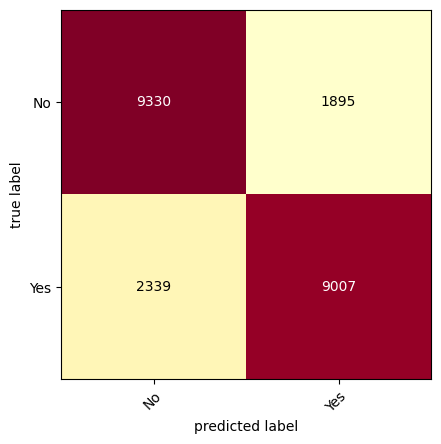

In [74]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(v , class_names=["No","Yes"], cmap='YlOrRd')

In [75]:
print (classification_report(y_test  , rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     11225
           1       0.83      0.79      0.81     11346

    accuracy                           0.81     22571
   macro avg       0.81      0.81      0.81     22571
weighted avg       0.81      0.81      0.81     22571

